# Code by Aishika Saha-18BCE2168


## IMPORTING THE NECESSARY LIBRARIES

In [18]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np

## READING THE IMAGE

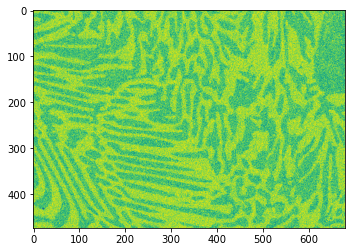

In [31]:
img = img_as_float(io.imread("pic2.jpg"))
plt.imshow(io.imread("pic2.jpg"))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        1.1000e+01, 1.0000e+01, 1.4000e+01, 1.3000e+01, 2.4000e+01,
        3.0000e+01, 3.7000e+01, 5.8000e+01, 6.1000e+01, 1.2800e+02,
        1.6800e+02, 1.7200e+02, 2.7000e+02, 2.5100e+02, 5.1000e+02,
        4.0800e+02, 6.5500e+02, 6.0300e+02, 1.0460e+03, 8.5500e+02,
        1.4790e+03, 1.7840e+03, 1.3940e+03, 2.5320e+03, 2.0030e+03,
        3.4760e+03, 2.6180e+03, 4.4520e+03, 3.3800e+03, 5.5410e+03,
        6.1280e+03, 4.5680e+03, 7.4770e+03, 5.46

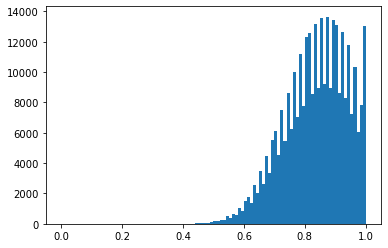

In [30]:
plt.hist(img.flat, bins=100, range=(0, 1)) 

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+01, 6.1000e+01,
        1.5300e+02, 4.1900e+02, 8.9600e+02, 2.05

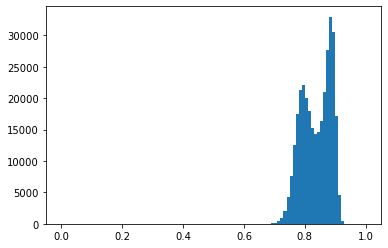

In [20]:
# Very noisy image so histogram looks horrible. Let us denoise and see if it helps.

from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
plt.hist(denoise_img.flat, bins=100, range=(0, 1)) 

In [21]:
# Much better histogram and now we can see two separate peaks. 
#Still close enough so cannot use histogram based segmentation.
#Let us see if we can get any better by some preprocessing.
#Let's try histogram equalization
from skimage import exposure   #Contains functions for hist. equalization

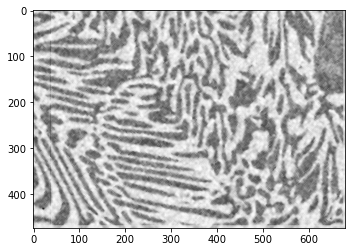

In [22]:
#eq_img = exposure.equalize_hist(denoise_img)
eq_img = exposure.equalize_adapthist(denoise_img)
plt.imshow(eq_img, cmap='gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+01, 6.1000e+01,
        1.5300e+02, 4.1900e+02, 8.9600e+02, 2.05

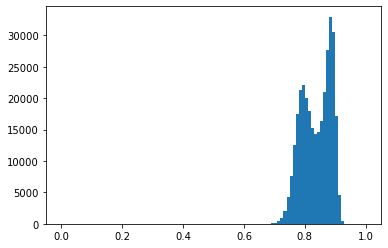

In [23]:
plt.hist(denoise_img.flat, bins=100, range=(0., 1))

In [24]:
#Not any better. Let us stretch the hoistogram between 0.7 and 0.95

# The range of the binary image spans over (0, 1).
# For markers, let us include all between each peak.
markers = np.zeros(img.shape, dtype=np.uint)

markers[(eq_img < 0.8) & (eq_img > 0.7)] = 1
markers[(eq_img > 0.85) & (eq_img < 0.99)] = 2

In [25]:
from skimage.segmentation import random_walker
# Run random walker algorithm
labels = random_walker(eq_img, markers, beta=10, mode='bf')
plt.imsave("markers.jpg", markers)
segm1 = (labels == 1)
segm2 = (labels == 2)
all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

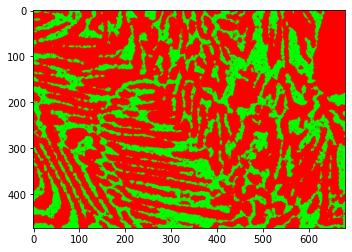

In [26]:
all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)

plt.imshow(all_segments)

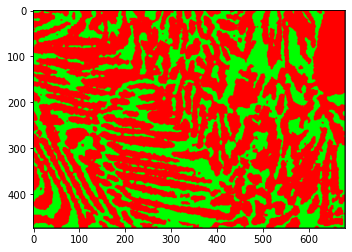

In [27]:
from scipy import ndimage as nd

segm1_closed = nd.binary_closing(segm1, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2, np.ones((3,3)))

all_segments_cleaned = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) 

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)

plt.imshow(all_segments_cleaned) 

In [32]:
plt.imsave("random_walker.jpg", all_segments_cleaned)